In [3]:
#
#NA01
#
%matplotlib inline
from pylab import *;import scipy as sp;import numpy as np;import matplotlib.pyplot as plt;
import matplotlib.patches as mpatches;import matplotlib.mlab as mlab;from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable;from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
#-----------------------------------------------------#
name0 = '0019';name1 = 'rjs'+name0;name2 = 'rjs-'+name0
#----------------Armazenando os Dados----------------------------------------------------#

data  = np.fromfile('../banco_de_dados_original/NA01.dat', dtype=float, count=-1, sep='	');alph=len(data)/1313
p = int (len(data)/alph)

print (len(data),'- comprimento original antes da divisão');print (p,'- comprimento de uma unica coluna')
print (alph,'- número de colunas');data  = np.reshape(data, (len(data)/alph,alph))
#----------------------------------------As propriedades petrofisicas do poco-------------------------------------#
prof=np.array(data[:,0],float);DTP=np.array(data[:,1],float);GR=np.array(data[:,2],float)
ILD  = np.array(data[:,3],float);PHIN = np.array(data[:,4],float);RHOb = np.array(data[:,5],float)
print ();print (prof[0],DTP[0],GR[0],ILD[0],PHIN[0],RHOb[0]);print(prof[162],prof[876],prof[1007]);del(data,alph)

7878 - comprimento original antes da divisão
1313 - comprimento de uma unica coluna
6.0 - número de colunas

2950.0556 86.9492 81.8789 1.707 25.7121 2.4499
2974.7444 3083.558 3103.5224


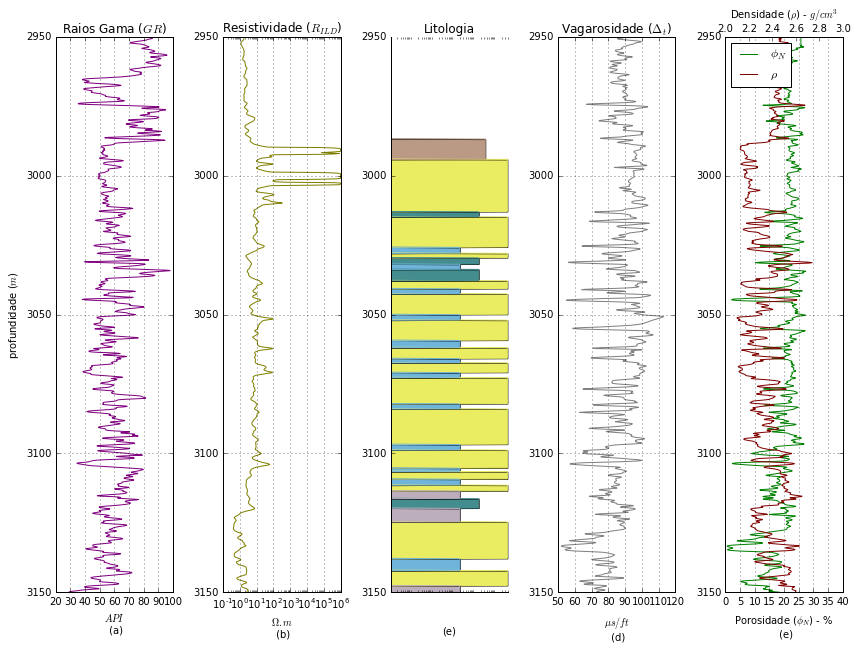

In [5]:
#
# Litologia
#
are = [0]*p;sil = [0]*p;mar = [0]*p;arg = [0]*p;mao = [0]*p

for i in range (p):
    if prof[i] >= 2986.7470 and prof[i] < 2994.0000:sil[i] = 70
    #----------------------------------------------#
    if prof[i] >= 2994.0000 and prof[i] < 3012.8931:are[i] = 90
    if prof[i] >= 3014.7799 and prof[i] < 3025.7862:are[i] = 90
    if prof[i] >= 3027.7862 and prof[i] < 3029.4862:are[i] = 90
    if prof[i] >= 3037.6862 and prof[i] < 3040.6862:are[i] = 90
    if prof[i] >= 3042.4862 and prof[i] < 3050.0000:are[i] = 90
    if prof[i] >= 3052.0080 and prof[i] < 3059.2369:are[i] = 90
    if prof[i] >= 3061.8072 and prof[i] < 3065.8635:are[i] = 90
    if prof[i] >= 3067.2961 and prof[i] < 3070.8835:are[i] = 90
    if prof[i] >= 3072.6908 and prof[i] < 3082.1285:are[i] = 90
    if prof[i] >= 3083.9357 and prof[i] < 3096.7871:are[i] = 90
    if prof[i] >= 3098.7952 and prof[i] < 3105.2209:are[i] = 90
    if prof[i] >= 3106.4257 and prof[i] < 3109.2369:are[i] = 90
    if prof[i] >= 3111.4458 and prof[i] < 3113.4538:are[i] = 90
    if prof[i] >= 3124.6988 and prof[i] < 3137.9518:are[i] = 90
    if prof[i] >= 3142.1687 and prof[i] < 3147.5904:are[i] = 90
    #----------------------------------------------#
    if prof[i] >= 3025.7862 and prof[i] < 3027.7862:mar[i] = 60
    if prof[i] >= 3031.8862 and prof[i] < 3033.6862:mar[i] = 60
    if prof[i] >= 3040.6862 and prof[i] < 3042.4862:mar[i] = 60
    if prof[i] >= 3050.0000 and prof[i] < 3052.0080:mar[i] = 60
    if prof[i] >= 3059.2369 and prof[i] < 3061.8072:mar[i] = 60
    if prof[i] >= 3065.8635 and prof[i] < 3067.2691:mar[i] = 60
    if prof[i] >= 3070.8835 and prof[i] < 3072.6908:mar[i] = 60
    if prof[i] >= 3082.1285 and prof[i] < 3083.9357:mar[i] = 60
    if prof[i] >= 3096.7871 and prof[i] < 3098.7952:mar[i] = 60
    if prof[i] >= 3105.2209 and prof[i] < 3106.4257:mar[i] = 60
    if prof[i] >= 3109.2369 and prof[i] < 3111.4458:mar[i] = 60
    if prof[i] >= 3137.9518 and prof[i] < 3142.1687:mar[i] = 60
    #----------------------------------------------#
    if prof[i] >= 3029.4862 and prof[i] < 3031.8862:arg[i] = 50
    if prof[i] >= 3033.6862 and prof[i] < 3037.6862:arg[i] = 50
    if prof[i] >= 3012.8931 and prof[i] < 3014.7799:arg[i] = 50
    if prof[i] >= 3116.2651 and prof[i] < 3119.6787:arg[i] = 50
    #----------------------------------------------#
    if prof[i] >= 3113.4538 and prof[i] < 3116.2651:mao[i] = 60
    if prof[i] >= 3119.6787 and prof[i] < 3124.6988:mao[i] = 60
    if prof[i] >= 3147.5904 and prof[i] < 3150.0000:mao[i] = 60
#-------------------------------------------------Granulometria---------------------------------------------------#
arem = [1e-6]*p;silt = [1e-6]*p;shal = [1e-6]*p;calu = [1e-6]*p;marl = [1e-6]*p

for i in range(p):
    if are[i] == 90:arem[i] = 0.375
    if sil[i] == 70:silt[i] = 0.033
    if arg[i] == 50:shal[i] = 0.016
    if mar[i] == 60:calu[i] = 0.002
    if mao[i] == 60:marl[i] = 0.002
del(are,sil,arg,mar,mao)
#-------------------------------------------------------Graficos--------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(GR,prof,'-',linewidth = 1,color='purple',label='$GR$');ax1.set_title(u'Raios Gama ($GR$)')
ax1.set_ylabel('profundidade ($m$)');ax1.set_xlabel('$API$ \n (a)');ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis();ax1.grid()
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$');ax2.set_title(u'Resistividade ($R_{ILD}$)')
ax2.set_xlabel('$\Omega.m$ \n (b)');ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax3.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61');ax3.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax3.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e');ax3.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax3.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe')
ax3.fill_betweenx(prof, arem, facecolor='#eaec61');ax3.fill_betweenx(prof, silt, facecolor='#bb9a85')
ax3.fill_betweenx(prof, shal, facecolor='#438d8e');ax3.fill_betweenx(prof, calu, facecolor='#6fb5db')
ax3.fill_betweenx(prof, marl, facecolor='#bdaebe')
ax3.set_title('Litologia');ax3.set_ylim(ymax=max(prof),ymin=min(prof));ax3.set_xlim(xmax=0.4,xmin=0)
ax3.invert_yaxis();ax3.spines['right'].set_visible(False);ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left');ax3.axes.get_xaxis().set_ticks([]);ax3.set_xlabel('(e)')
ax3.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')   
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
lab5 = ax5.plot(PHIN,prof,'-',linewidth = 1,color='green',label='$\phi_N$')
ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (e)');ax0 = ax5.twiny()
lab0 = ax0.plot(RHOb,prof,'-',linewidth = 1,color='maroon',label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$');labf = lab5+lab0
labs = [l.get_label() for l in labf];plt.legend(labf, labs, loc=2);ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax0.set_xlim(xmax=3.0,xmin=2.0);ax5.set_xlim(xmax=40.0,xmin=0.0);ax5.invert_yaxis();ax5.grid()
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

0.466312567563 media (IGR) - indice de raio gama
0.225311517157  media (VSH) - quantidade de folhelho 
2.65 RHOma| 1.101 RHOf 55.5 DTPm 189.0 DTPf

19.0082199311  media (PHItd)%
0.909010129833  media (PHIsh)%
14  ponto de folhelho (Psh)
9.0531137235 = porosidade sh tabelada| 22.09737827715356 = porosidade sh calculada
17.699114925 = porosidade D, tabelada| 17.369947744 = porosidade D, calculada
17.1758866137 = porosidade S, tabelada| 22.0075804019 = porosidade, S calculada


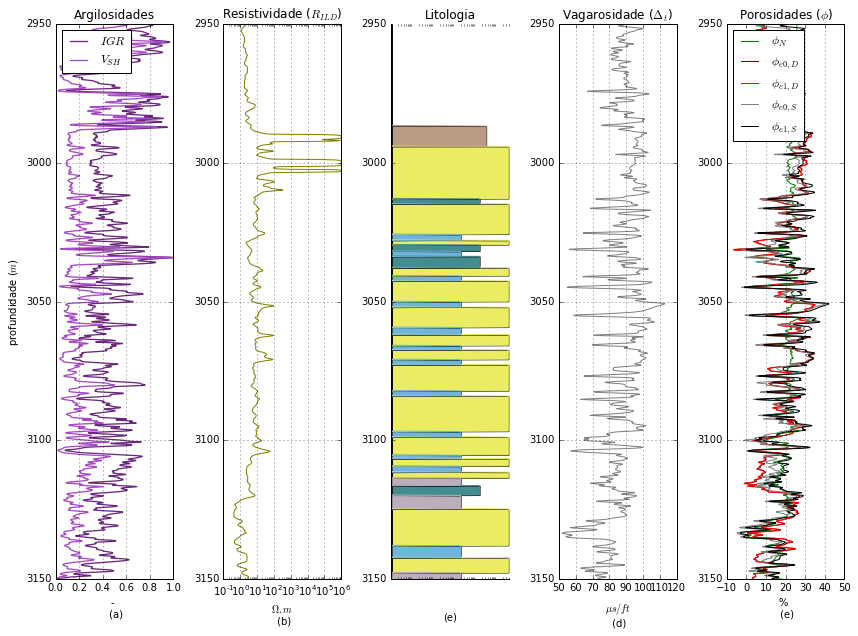

In [6]:
#
#Raio Gamma
#
IGR = [];VSH = []

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)       # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print(mean(IGR),'media (IGR) - indice de raio gama');print(mean(VSH),' media (VSH) - quantidade de folhelho ')
#
#Porosidade
#
RHOf  = 1.101;DTPf = 189.0;RHOma = 2.65;DTPma = 55.5;RHOsh = 2.56;DTPsh = 85.0
print (RHOma, 'RHOma|',RHOf,'RHOf',DTPma,'DTPm',DTPf,'DTPf')
#------------------------------------------------------------------------------------------------#
PHItd = [];PHIsh = [] # Porosidade total - perfil densidade e Porosidade aparente - folhelho

for i in range (p):
    PHItd0 = (100*(RHOb[i] - RHOma)/(RHOf - RHOma))# Porosidade total - perfil densidade
    PHIsh.append(PHIN[i] - PHItd0)
    PHItd.append(PHItd0)
print ();print (mean(PHItd),' media (PHItd)%');print (mean(PHIsh),' media (PHIsh)%')
#------------------------------------------------------------------------------------------------#
for i in range (p):
    if PHIsh[i] == max(PHIsh):Psh = i
        
print (Psh,' ponto de folhelho (Psh)');RHOsh2 = RHOb[Psh];VPsh2  = 108.8*(RHOsh2**4.0)
DTPsh2 = 1.0/((3.2808*(10**(-6)))*VPsh2)
PHIs0  = 100.0*((DTPsh2 - DTPma)/(DTPf - DTPma));PHIs1 = 100.0*((DTPsh  - DTPma)/(DTPf - DTPma))
print (PHIs0,'= porosidade sh tabelada|',PHIs1,'= porosidade sh calculada')
#--------------------------------Porosidade Efetiva Densidade------------------------------------#
PHIed0 = [];PHIed1 = []
for i in range (p):
    PHIed0.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh  - RHOma)/(RHOf - RHOma)))*100)
    PHIed1.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh2 - RHOma)/(RHOf - RHOma)))*100)
    
print (mean(PHIed0),'= porosidade D, tabelada|',mean(PHIed1),'= porosidade D, calculada')
#-----------------------------------------Porosidade Sonica--------------------------------------------------
PHIts = [];PHIes0 = [];PHIes1 = []

DTPsh = DTP[Psh]
for i in range (p):
    PHIts.append(((DTP[i] - DTPma)/(DTPf - DTPma))*100.0)    # Porosidade total - perfil sonico
    PHIes0.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh  - DTPma)/(DTPf - DTPma))))*100.00)
    PHIes1.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh2 - DTPma)/(DTPf - DTPma))))*100.00)
print (mean(PHIes0),'= porosidade S, tabelada|',mean(PHIes1),'= porosidade, S calculada')
#--------------------------------------------------------Graficos------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(IGR,prof,'-',linewidth = 1.3,color='#6A287E',label='$IGR$')
ax1.plot(VSH,prof,'-',linewidth = 1.3,color='#A74AC7',label='$V_{SH}$')
ax1.set_title(u'Argilosidades');ax1.set_xlabel('- \n (a)');ax1.set_ylabel('profundidade ($m$)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.invert_yaxis();ax1.grid();ax1.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$')
ax2.set_title(u'Resistividade ($R_{ILD}$)');ax2.set_xlabel('$\Omega.m$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax3.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61');ax3.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax3.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e');ax3.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax3.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe')
ax3.fill_betweenx(prof, arem, facecolor='#eaec61');ax3.fill_betweenx(prof, silt, facecolor='#bb9a85')
ax3.fill_betweenx(prof, shal, facecolor='#438d8e');ax3.fill_betweenx(prof, calu, facecolor='#6fb5db')
ax3.fill_betweenx(prof, marl, facecolor='#bdaebe')
ax3.set_title('Litologia');ax3.set_ylim(ymax=max(prof),ymin=min(prof));ax3.set_xlim(xmax=0.4,xmin=0)
ax3.invert_yaxis();ax3.spines['right'].set_visible(False);ax3.spines['top'].set_visible(False)
ax3.yaxis.set_ticks_position('left');ax3.axes.get_xaxis().set_ticks([]);ax3.set_xlabel('(e)')
ax3.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')    
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
ax5.plot(PHIN  ,prof,'-',linewidth = 1,color='Green' ,label='$\phi_N$')
ax5.plot(PHIed0,prof,'-',linewidth = 1,color='Maroon',label='$\phi_{e0,D}$')
ax5.plot(PHIed1,prof,'-',linewidth = 1,color='red',label='$\phi_{e1,D}$')
ax5.plot(PHIes0,prof,'-',linewidth = 1,color='Gray'  ,label='$\phi_{e0,S}$')
ax5.plot(PHIes1,prof,'-',linewidth = 1,color='Black' ,label='$\phi_{e1,S}$')
ax5.set_title('Porosidades ($\phi$)');ax5.set_xlabel('% \n (e)');ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.invert_yaxis();ax5.grid();ax5.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show();del(IGR)

In [7]:
#
# VP
#
cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*DTP[i]))

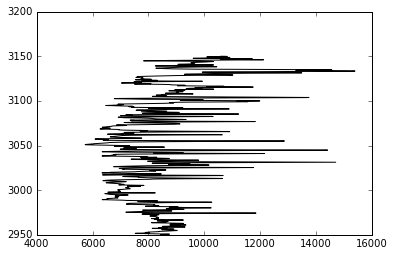

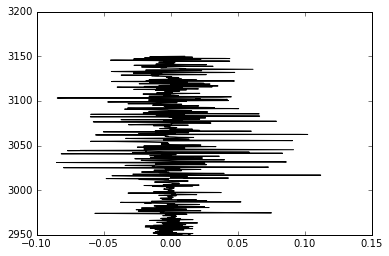

In [8]:
#--------------------------------------Impedancia---(transformado de pe pra m)-----------------------------------#
RHOsi = []

for i in range (p):
    RHOsi.append(RHOb[i]*0.001) # convertendo de g/cm3 para Kg/m3 (S.I.)
#------------------------------------------------------Impedancia Acustica---------------------------------------#
z_imp = [];z_imp_e = [];z_imp_p = [] # Impedancias acusticas(m/s).(g/cm3)
Z = [] # Impedancias acusticas (Km/s).(g/cm3)

for i in range (p):
    z_imp0 = (RHOsi[i]*VP  [i]);z_imp.append(z_imp0);Z.append(z_imp0*1000.000)
    #------------------------------------------------------------------------------------------------------------#
plt.plot(Z ,prof,'-k',linewidth = 1);plt.show()
#-----------------------------------------------Refletividades---------------------------------------------------#
R = [] # Refletividades

for i in range (p):
    if i == 0:
        RR = 0
    if i != 0:
        RR = (z_imp[i-1] - z_imp[i])/(z_imp[i-1] + z_imp[i])
    R.append(RR)
    
zero_bar = [0]*p
#-------------------------------------------------------------------------------------------------------------#
plt.plot(R ,prof,'-k',linewidth = 1);plt.show()

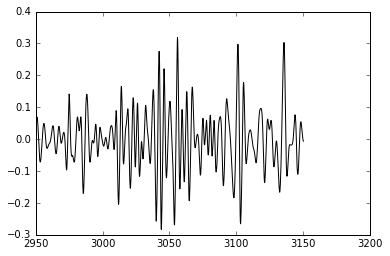

In [10]:
#----------------------------------------------Amplitude Sismica--------------------------------------------------#
DL = prof[3]-prof[2];To = [];f = 600

for i in range (p):
    To.append(DL/VP[i])
    
TTT = np.cumsum(To)

signal = []
for j in range (p):
    wavk = []
    for i in range (len(TTT)):
        EE1 = -(np.pi**2)*(f**2)*((TTT[j] - TTT[i])**2)
        wav0 = R[i]*(1 - (2*(np.pi**2)) * (f**2) * ((TTT[j] - TTT[i])**2))*np.exp(EE1);wavk.append(wav0)
    FXO1 = np.sum(wavk)
    signal.append(FXO1)
    
plt.plot(prof,signal ,'-k');plt.show()

In [12]:
RV = 2;medVP=round(np.mean(VP),RV);maxVP=round(max(VP),RV);minVP=round(min(VP),RV);varVP=round(np.var(VP),RV)
stdVP=round(np.std (VP),RV)
#----------------------------------------------#
print ("-----------valores de VP-------------");print (medVP,"m/s   - media ");print (maxVP,"m/s   - valor maximo")
print (minVP,"m/s   - valor minimo");print (varVP,"m²/s² - variancia");print (stdVP,"m/s   - desvio padrao")
print ("-------------------------------------")
#----------------------------------------------#

-----------valores de VP-------------
3537.76 m/s   - media 
5858.65 m/s   - valor maximo
2699.29 m/s   - valor minimo
245940.85 m²/s² - variancia
495.92 m/s   - desvio padrao
-------------------------------------


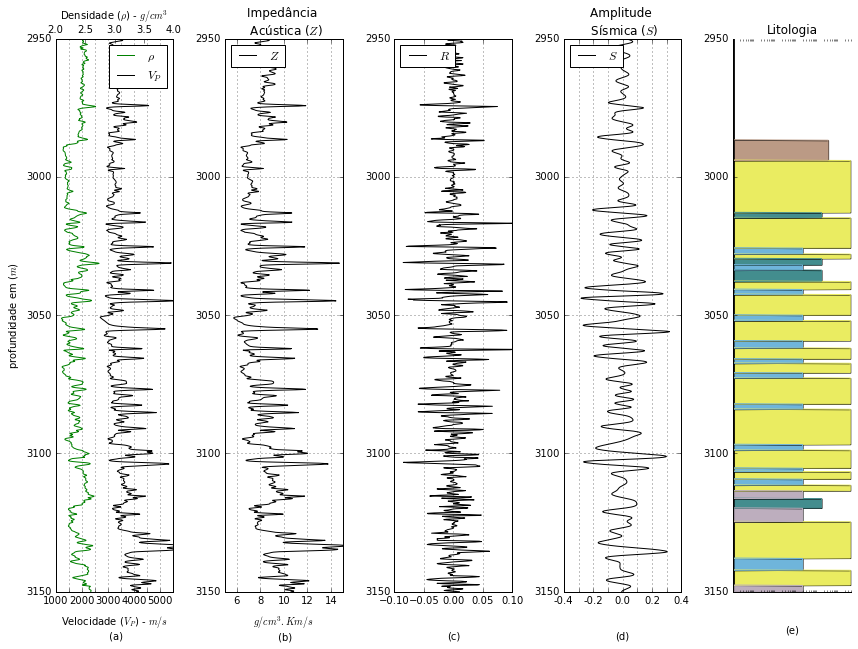

In [15]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
lab1=ax1.plot(PHIN,prof,'-k',linewidth=1,label='$\phi_N$')
lab1=ax1.plot(VP ,prof,'-k',linewidth =1,label='$V_P$')
ax1.set_ylabel('profundidade em ($m$)');ax0=ax1.twiny()

lab0 = ax0.plot(RHOb,prof,'-g',linewidth = 1,label='$\\rho$');ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$')
ax1.set_xlabel('Velocidade ($V_P$) - $m/s$ \n (a)');labf = lab0+lab1;labs=[l.get_label()for l in labf]
plt.legend(labf, labs, loc=0);ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.set_xlim(xmax=5500,xmin=1000)
ax0.set_xlim(xmax=4,xmin=2);ax1.invert_yaxis();ax1.grid()
ax1.set_xticklabels([1000," ",2000," ",3000," ",4000," ",5000," "])
#--------------------------------------------------------------------------------------------------#
ax2.plot(z_imp  ,prof,'-k',linewidth = 1,label='$Z$')
ax2.set_title(u'Impedância \n Acústica ($Z$)');ax2.set_xlabel('$g/cm^3 . Km/s$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.set_xlim(xmax=15,xmin=5);ax2.invert_yaxis();ax2.grid()
ax2.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax3.plot(R ,prof,'-k',linewidth = 1,label='$R$')
ax3.set_xlabel('(c)');ax3.xaxis.set_label_coords(0.5, -0.07);ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=0.1,xmin=-0.1);ax3.invert_yaxis();ax3.grid();ax3.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax4.plot(signal ,prof,'-k',linewidth = 1,label='$S$');ax4.set_title('Amplitude \n Sísmica ($S$)')
ax4.set_xlabel('(d)');ax4.xaxis.set_label_coords(0.5, -0.07);ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.set_xlim(xmax=0.4,xmin=-0.4);ax4.invert_yaxis();ax4.set_xticklabels([-0.4," ",-0.2," ",0.0," ",0.2," ",0.4])
ax4.grid();ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax5.semilogx(arem,prof,'-',linewidth = 1,color='#eaec61');ax5.semilogx(silt,prof,'-',linewidth = 1,color='#bb9a85')
ax5.semilogx(shal,prof,'-',linewidth = 1,color='#438d8e');ax5.semilogx(calu,prof,'-',linewidth = 1,color='#6fb5db')
ax5.semilogx(marl,prof,'-',linewidth = 1,color='#bdaebe');ax5.fill_betweenx(prof, arem, facecolor='#eaec61')
ax5.fill_betweenx(prof, silt, facecolor='#bb9a85');ax5.fill_betweenx(prof, shal, facecolor='#438d8e')
ax5.fill_betweenx(prof, calu, facecolor='#6fb5db');ax5.fill_betweenx(prof, marl, facecolor='#bdaebe')
ax5.set_title('Litologia');ax5.set_ylim(ymax=max(prof),ymin=min(prof));ax5.set_xlim(xmax=0.4,xmin=0)
ax5.invert_yaxis();ax5.spines['right'].set_visible(False);ax5.spines['top'].set_visible(False)
ax5.yaxis.set_ticks_position('left');ax5.axes.get_xaxis().set_ticks([]);ax5.set_xlabel('(e)')
ax5.xaxis.set_label_coords(0.5, -0.06)

plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

name_b = '../../mario_tese/Figs/pocos/RJS'+name0+'perfil2.png';transparent=True
fig.savefig(name_b, dpi=100, transparent=True, bbox_inches='tight')

In [16]:
X = [352964]*p
Y = [7517317]*p

#-----------Nota: caso o sonico nao exista, os valores de augusto e siqueira sao os originais.
#-----------Caso contrario, sao os modelos testados

filef = np.array([[-999.000]*14]*p)
filef[:,0] = X
filef[:,1] = Y
filef[:,2] = prof   # profundidade
filef[:,3] = DTP    # sonico 
filef[:,4] = GR     # gama ray
filef[:,5] = ILD    # resistividade
filef[:,6] = PHIN   # porosidade neutronica
filef[:,7] = RHOb   # densidade

#----------------Siqueira----------------------#

filef[:,8] = z_imp  # Impedancia acustica
filef[:,9] = R      # Refletividade
filef[:,10] = signal # Sismograma sintetico

#----------------Augusto-----------------------#

filef[:,11]= z_imp  # Impedancia acustica
filef[:,12]= R      # Refletividade
filef[:,13]= signal # Sismograma sintetico

np.savetxt('../banco_de_dados_mario/na01_mario.dat', filef, delimiter=' ', fmt='%.4f')